In [11]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/Womens Clothing E-Commerce Reviews.csv")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
#Task A-Data Preparation and EDA
#1. Describe the dataset: source, variables, target variable (if any), missingness,data types.

# Importing all required libraries
import pandas as pd                 #to do data handling and visualization
import numpy as np                  #to use for numerical part
import matplotlib.pyplot as plt     #to make the plots
import seaborn as sns               #to visualize the statistical plots
import warnings
warnings.filterwarnings('ignore')   #to hide unwanted warnings
import os                           #to check whether dataset file exists locally in device

# Loading data from csv file in local system and also providing kaggle link

if os.path.exists("/kaggle/input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv"):
    DATA_PATH = "/kaggle/input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv"
else:
    DATA_PATH = r"C:\Users\reewa\Downloads\Womens Clothing E-Commerce Reviews.csv"
#For reading the dataset in google colab path
df = pd.read_csv("/content/drive/MyDrive/Womens Clothing E-Commerce Reviews.csv")
#For displaying the first few rows of dataset to see how data is structured
df.head()

#Checking information of dataset like number of entries,datatypes,columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [4]:
#2.Perform missing data treatment and provide justification for chosen method(s).
#Show before-and-after summary

# the original data before performing mising data treatment
print("--- Before Missing Data Treatment ---")
df.info()
print("\nMissing values before treatment:")
print(df.isnull().sum())

#justification
# to understand feedback sentiment review text is needed
#Selecting only rows with review text for needed info and dropping other rows without them
df = df.dropna(subset=['Review Text'])

# for the product category columns
#selecting categories that are important for grouping and comparison
#Filling the missing values with a placeholder Data Unknown to not lose useful review data
for col in ['Division Name','Department Name','Class Name']:
    df[col] = df[col].fillna('Data is Unknown')

# After changing the missing data
print("\n--- After Missing Data Treatment ---")
df.info()
print("\nMissing values after treatment:")
print(df.isnull().sum())

--- Before Missing Data Treatment ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB

Missing values before treatment:
Unnamed: 0                    0
Clothing ID                   0
Age             

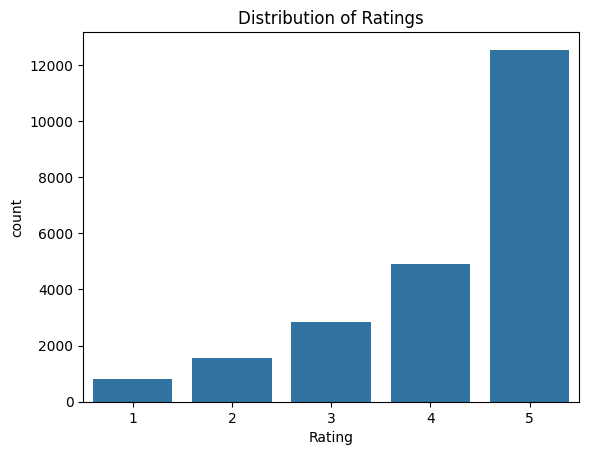

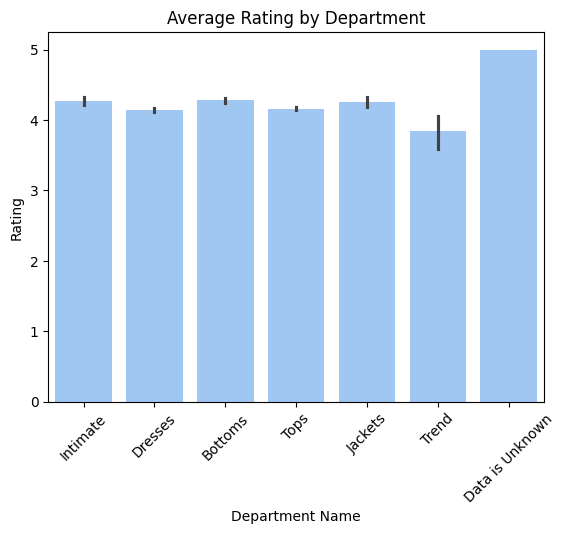

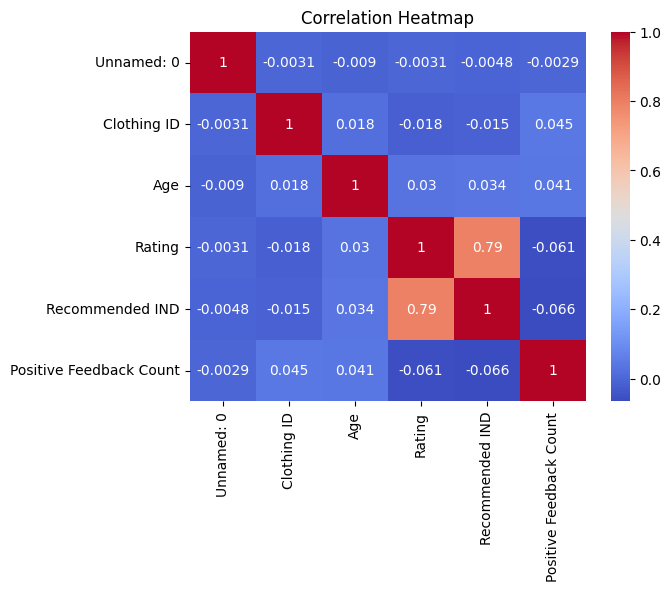

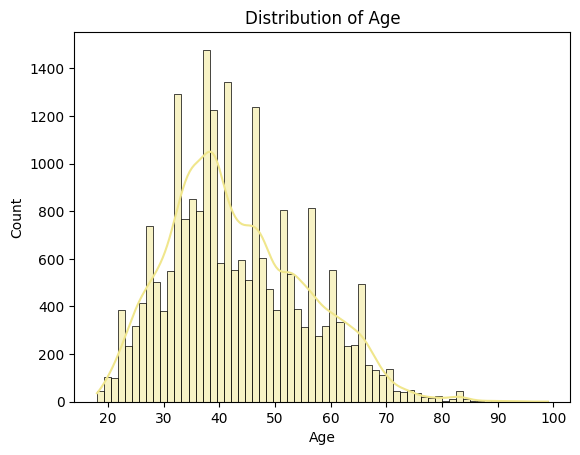

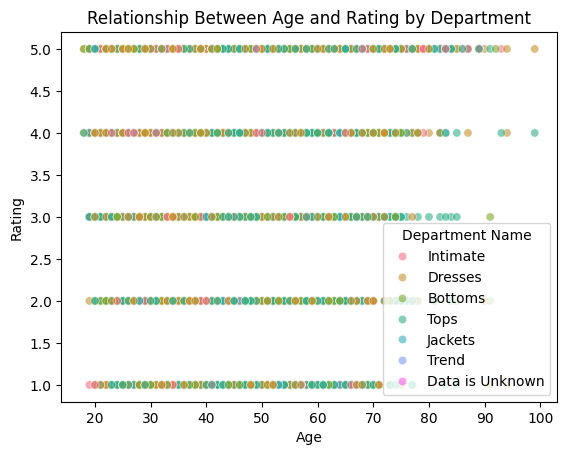

In [5]:
#3. Create at least five insightful visualizations (distribution, correlation heatmap, pairwise plots, time series if applicable).
#Explain three actionable insights derived from EDA.
# a. Distribution of ratings as to see which are common
sns.countplot(x='Rating', data=df)
plt.title("Distribution of Ratings")
plt.show()

# b. Average Rating by Department to see which customers were more satisfied
plt.style.use('seaborn-v0_8-pastel')
sns.barplot(x='Department Name', y='Rating', data=df, estimator=np.mean)
plt.title("Average Rating by Department")
plt.xticks(rotation=45) #For easier readability rotate the labels as according to axis
plt.show()

# c. Correlation heatmap to how these numerical values are related to others
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# d. Distribution of the Age  to see the various age groups of customers
sns.histplot(x='Age', data=df, kde=True, color='khaki') # Set color to khaki
plt.title("Distribution of Age")
plt.show()

# e. Age vs Rating by using different colors for each department(Scatter Plot)
plt.style.use('seaborn-v0_8-pastel')
sns.scatterplot(x='Age', y='Rating', data=df, hue='Department Name', alpha=0.6)
plt.title("Relationship Between Age and Rating by Department")
plt.show()


In [6]:
#4. Provide feature transformations (scaling, encoding, log transforms). Explain why and
#show diagnostics

import pandas as pd
from sklearn.preprocessing import StandardScaler

# Encoding the selected categorical columns
#to avoid any dummy variable useing drope first as true
df_encoded = pd.get_dummies(df, columns=['Division Name','Department Name','Class Name'], drop_first=True)

# Scaling numeric variables
scaler = StandardScaler()

#Age and positive feedback count is standardized so that they contribute much to the model
df_encoded[['Age','Positive Feedback Count']] = scaler.fit_transform(df_encoded[['Age','Positive Feedback Count']])

# Diagnostics Output
print("--- After Feature Transformations ---")
print("\nFirst 7 rows of the transformed DataFrame:")
display(df_encoded.head(7))

print("\nData types after transformation:")
print(df_encoded.dtypes)

print("\nDescriptive statistics of scaled numerical features:")
display(df_encoded[['Age','Positive Feedback Count']].describe())

--- After Feature Transformations ---

First 7 rows of the transformed DataFrame:


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name_General,Division Name_General Petite,...,Class Name_Legwear,Class Name_Lounge,Class Name_Outerwear,Class Name_Pants,Class Name_Shorts,Class Name_Skirts,Class Name_Sleep,Class Name_Sweaters,Class Name_Swim,Class Name_Trend
0,0,767,-0.833992,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,-0.454643,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,1080,-0.752867,NaN,Love this dress! it's sooo pretty. i happene...,5,1,0.236676,True,False,...,False,False,False,False,False,False,False,False,False,False
2,2,1077,1.356374,Some major design flaws,I had such high hopes for this dress and reall...,3,0,-0.454643,True,False,...,False,False,False,False,False,False,False,False,False,False
3,3,1049,0.545127,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,-0.454643,False,True,...,False,False,False,True,False,False,False,False,False,False
4,4,847,0.301753,Flattering shirt,This shirt is very flattering to all due to th...,5,1,0.582336,True,False,...,False,False,False,False,False,False,False,False,False,False
5,5,1080,0.464003,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,0.236676,True,False,...,False,False,False,False,False,False,False,False,False,False
6,6,858,-0.347244,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,-0.281813,False,True,...,False,False,False,False,False,False,False,False,False,False



Data types after transformation:
Unnamed: 0                           int64
Clothing ID                          int64
Age                                float64
Title                               object
Review Text                         object
Rating                               int64
Recommended IND                      int64
Positive Feedback Count            float64
Division Name_General                 bool
Division Name_General Petite          bool
Division Name_Initmates               bool
Department Name_Data is Unknown       bool
Department Name_Dresses               bool
Department Name_Intimate              bool
Department Name_Jackets               bool
Department Name_Tops                  bool
Department Name_Trend                 bool
Class Name_Casual bottoms             bool
Class Name_Chemises                   bool
Class Name_Data is Unknown            bool
Class Name_Dresses                    bool
Class Name_Fine gauge                 bool
Class Name_Intimates

,Age,Positive Feedback Count
count,2.264100e+04,2.264100e+04
mean,-6.088304e-17,1.882981e-18
std,1.000022e+00,1.000022e+00
min,-2.050862e+00,-4.546432e-01
25%,-7.528674e-01,-4.546432e-01
50%,-1.849948e-01,-2.818133e-01
75%,7.073766e-01,6.384653e-02
max,4.520236e+00,2.063060e+01


In [7]:
#Task B – OLS Regression Model
#1. Build an OLS model using at least 6 predictors. Report coefficients, standard errors,t-statistics, and p-values.

import statsmodels.api as am

#We select some predictors that is some numerical and some caterical features

features = ['Age','Positive Feedback Count','Recommended IND',
            'Department Name_Tops','Department Name_Dresses','Class Name_Knits']

# Converting the boolean or dummy columns to integer to lessen issues in dtype
X = df_encoded[features].astype(int)
y = df_encoded['Rating']

#Adding the constant for the intercept part in equation of reegression
X = am.add_constant(X)

#Fitting the ols model
ols_model = am.OLS(y, X).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     6381.
Date:                Thu, 06 Nov 2025   Prob (F-statistic):               0.00
Time:                        12:24:19   Log-Likelihood:                -23397.
No. Observations:               22641   AIC:                         4.681e+04
Df Residuals:                   22634   BIC:                         4.686e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [8]:
print(X.dtypes)

const                      float64
Age                          int64
Positive Feedback Count      int64
Recommended IND              int64
Department Name_Tops         int64
Department Name_Dresses      int64
Class Name_Knits             int64
dtype: object


In [9]:
print(df_encoded.columns)

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name_General',
       'Division Name_General Petite', 'Division Name_Initmates',
       'Department Name_Data is Unknown', 'Department Name_Dresses',
       'Department Name_Intimate', 'Department Name_Jackets',
       'Department Name_Tops', 'Department Name_Trend',
       'Class Name_Casual bottoms', 'Class Name_Chemises',
       'Class Name_Data is Unknown', 'Class Name_Dresses',
       'Class Name_Fine gauge', 'Class Name_Intimates', 'Class Name_Jackets',
       'Class Name_Jeans', 'Class Name_Knits', 'Class Name_Layering',
       'Class Name_Legwear', 'Class Name_Lounge', 'Class Name_Outerwear',
       'Class Name_Pants', 'Class Name_Shorts', 'Class Name_Skirts',
       'Class Name_Sleep', 'Class Name_Sweaters', 'Class Name_Swim',
       'Class Name_Trend'],
      dtype='object')


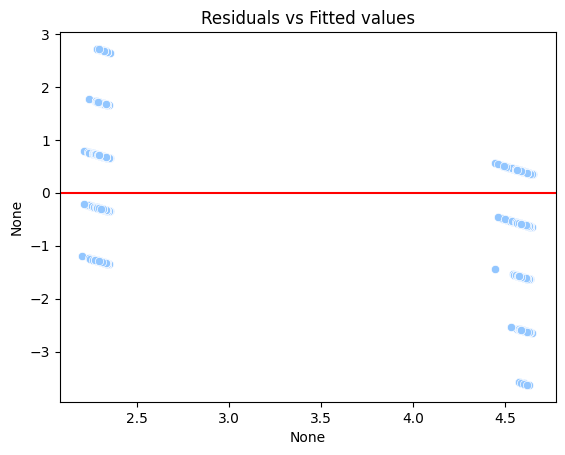

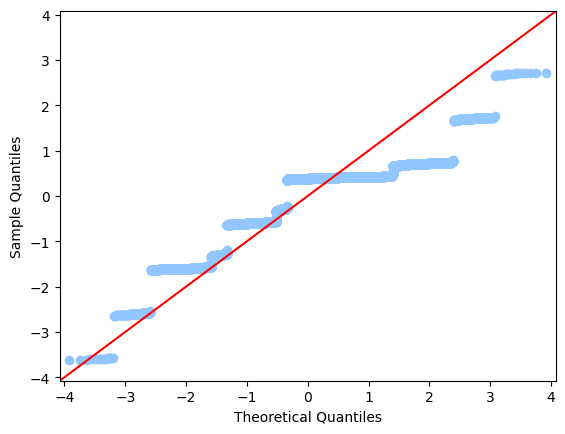

In [10]:
#2. If assumptions are violated, propose remedies and re-estimate. Show results and discuss improvements.

#Residuals analysis for finding the validity of the model
residuals = ols_model.resid
fitted = ols_model.fittedvalues

# checking the linearity where points should be scattered in plot arounf the line of zero
sns.scatterplot(x=fitted, y=residuals)
plt.axhline(0, color='red')
plt.title("Residuals vs Fitted values")
plt.show()

# the checking of normality of residuals where points should follow around the straight diagonal line
am.qqplot(residuals, line='45')
plt.show()


In [11]:
#Task C – Machine Learning Models (Regression/Classification)
#1. Choose and justify two supervised models. Train using proper cross-validation andhyperparameter tuning. (6 marks)

#Importing wanted libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

#Data Splitting
#defining the features(X) i.e, independent variable by removing the target and text columns
X = df_encoded.drop(['Rating', 'Title', 'Review Text'], axis=1) # Drop text fields that are 'Rating' 'Title' and 'Review Text'
#Defining (Y) i.e, dependent variable that is the target we are trying to predict
y = df_encoded['Rating']
#Splitting the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

#training the Random Forest Regressor with hyperparameters
rf = RandomForestRegressor(
    n_estimators=222,         #Gives the number of decision trees on the forest
    random_state=42)          #gives same or consitent results every run
#Fitting or tain the random forest model
rf.fit(X_train, y_train)

#predicting ratings for test data using the trained model
y_pred = rf.predict(X_test)

# Calculating Mean Absolute Error i.e, the average of absolute prediction errors
mae = mean_absolute_error(y_test, y_pred)

# Calculating the R² i.e, coefficient of determination — how much variance is explained)
r2 = r2_score(y_test, y_pred)

#printing the evaluation matrics below as readable output
print("Model Evaluation Metrics")
print("MAE:", mean_absolute_error(y_test, y_pred))      # Lower MAE = better accuracy
print("R2:", r2_score(y_test, y_pred))                  # Higher R² = better model fit


Model Evaluation Metrics
MAE: 0.5657842651660272
R2: 0.5990208017401247


In [12]:

#2. Present model evalua tion using appropriate metrics

# Importing Logistic Regression model and performance metrics needed
from sklearn.linear_model import LogisticRegression                 #This model classifies binary outcomes
from sklearn.metrics import accuracy_score, f1_score                #This measures how well the model performs

#Creating Xc as the independent variable
Xc = df_encoded.drop(['Recommended IND','Rating', 'Title', 'Review Text'], axis=1) # Drop 'Title' and 'Review Text'
#The 'Recommended IND' is the traget column here,and 'Title', 'Review Text' columns are removed as they are textual not numeric colmuns

#Creating yc as the dependent variable i.e, target
yc = df_encoded['Recommended IND']     #This is used to see if customer has recommended the product 1 for yes 0 for no

#Splitting the dataset into training and testing
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.2,
                                                        random_state=42)#gives same or consitent results every run
#Training the model
#creating model and increasing max iterations to 500  to make it converge well
log_reg = LogisticRegression(max_iter=500)

#Training the model on the training data
log_reg.fit(Xc_train, yc_train)  #This makes the model learn relation between featurees and the recommendation results

#Using trained model to predict recommendation on test data
yc_pred = log_reg.predict(Xc_test)   #This model predicts whether the customer will recommend the product

#This measures accuracy of models predictions higher the better
print("Accuracy:", accuracy_score(yc_test, yc_pred))

#Thus calculate the F1 score that tells you how good the model is at taking both positive and negative cases fairly
print("F1:", f1_score(yc_test, yc_pred))

Accuracy: 0.8200485758445573
F1: 0.9011282300133446


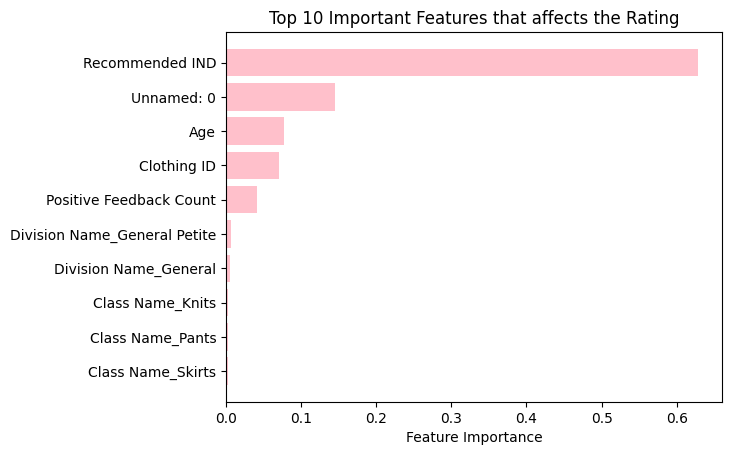

In [15]:
#3. Perform feature importance and discuss the top features affecting predictions.


#extracting importance of each feature as to how much they affect the predictions
importances = rf.feature_importances_

#sorting the feature indices as to top ten most important feature names
indices = np.argsort(importances)[-10:]

#creating a horizontal bar chart of 10 most importanrt features
plt.barh(range(len(indices)), importances[indices[:10]],color="pink")
plt.xlabel("Feature Importance")                                        # X-axis label
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])        #Chart title
plt.title("Top 10 Important Features that affects the Rating")
plt.show()


In [16]:
#5. Provide a short plan for deploying the best model and its monitoring strategy.

#importing joblib library which can be used to save and load models
import joblib

#saving the trained model to a .pkl file
joblib.dump(rf, "fashion_rating_model.pkl") #saving to a file make it easier for user to use models later without retraing every sinlge time


['fashion_rating_model.pkl']

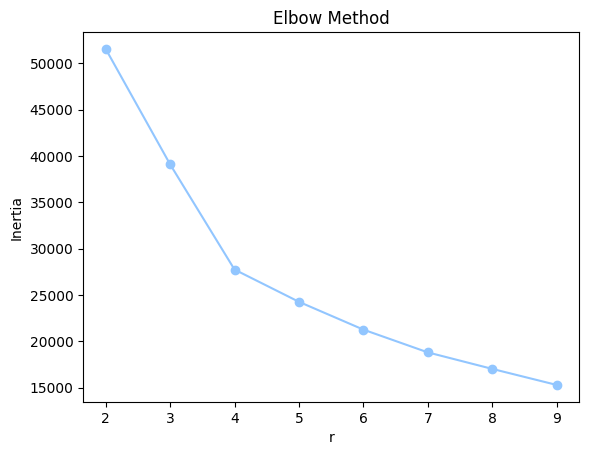

,Age,Rating,Positive Feedback Count
Cluster,,,
0,35.425049,4.714339,1.872057
1,56.875289,4.666908,3.146821
2,41.339164,2.364294,3.551267


In [17]:
#Task D – Unsupervised Learning
#1. Apply at least one clustering algorithm. Show elbow plot, and cluster profiles

import pandas as pd
import matplotlib.pyplot as plt
#importing kmeans algorithm from the scikit learn for customer sgementing
from sklearn.cluster import KMeans

#Selecting features that are numerical which  would best represent the customer behaviour
X_cluster = df_encoded[['Age','Rating','Positive Feedback Count']]

#making a empty list to store inertia values for each kmeans model
inertia = []            #this shows how close data points are actually to the center of the clusters

#looping through the cluster numbers i.e, 2-9 for finding the best one
for r in range(2,10):
    model = KMeans(n_clusters=r, random_state=42, n_init=10)    #creating kmeans model with clusters 'r'
    model.fit(X_cluster)                                        #fitting model to selected features by user
    inertia.append(model.inertia_)                              #storing models inertia i.e, sum of squared distances between clusters

#plotting the curve elbow to see visually where the inertia flattens i.e, elow point
plt.plot(range(2,10), inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("r")
plt.ylabel("Inertia")
plt.show()

#Seeing the elbow plot we assume 3 cluters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10) # added the n_init to avoid warnings
#fitting the kmeans model and assigning each record to one cluster
df['Cluster'] = kmeans.fit_predict(X_cluster)
#group the customer by assigned cluster and calculate average value pf numeric features
df.groupby('Cluster')[['Age','Rating','Positive Feedback Count']].mean() # Selecting only numeric columns for the mean value